Prediction of anonymized diabetes data
===============================

## Imports

Importing needed packages:

In [229]:
import pandas 
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

# turn of warnings
import warnings
warnings.filterwarnings('ignore')

## Import Data

In [230]:
data= pandas.read_csv('diabetis_anonymized01.csv', index_col=0);

display(data.head())


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,"[0, 5[",84,"[0, 20[",0,0,"[0, 5[",0.304,"[21, 40[",0
1,"[0, 5[",74,"[0, 20[",0,0,"[0, 5[",0.102,"[21, 40[",0
2,"[0, 5[",94,"[0, 20[",0,0,"[0, 5[",0.256,"[21, 40[",0
3,"[0, 5[",80,"[0, 20[",0,0,"[0, 5[",0.174,"[21, 40[",0
4,"[0, 5[",116,"[0, 20[",0,0,"[20, 25[",0.187,"[21, 40[",0


## Data preparation


In [231]:
target=data['Outcome']
data=data.drop(['Outcome'],axis=1)
## One-Hot Encoding
enc=np.array(['Pregnancies','BloodPressure','BMI','Age'])
enc2 = np.array(['Glucose','SkinThickness','Insulin','DiabetesPedigreeFunction'])

##naive bayes data -> encoding all values because of the use of Bernouli NB
nb_data=pandas.get_dummies(data,columns=list(data.columns))

#data for rf
data= pandas.get_dummies(data,columns=enc)

## saving the labels
labels= list(data.columns)


## Splitting the data in train and test data

In [232]:
# splitting data for rf
train_pred, test_pred, train_target, test_target = train_test_split(data, target, test_size=0.33,random_state=42)
display(train_pred.head())
display(test_pred.head())

#splitting data for nb
nb_train_pred, nb_test_pred, nb_train_target, nb_test_target = train_test_split(nb_data, target, test_size=0.33,random_state=42)

display(list(set(nb_test_pred.columns)-set(nb_train_pred.columns)))
## Transform everythin to np.array
train_pred=np.array(train_pred)
train_target=np.array(train_target)

test_pred=np.array(test_pred)
test_target=np.array(test_target)


nb_test_pred=np.array(nb_test_pred)
nb_train_pred=np.array(nb_train_pred)


,Glucose,SkinThickness,Insulin,DiabetesPedigreeFunction,"Pregnancies_[0, 5[","Pregnancies_[10, 15[","Pregnancies_[5, 10[","BloodPressure_[0, 20[","BloodPressure_[40, 60[","BloodPressure_[60, 80[",...,"BMI_[15, 20[","BMI_[20, 25[","BMI_[25, 30[","BMI_[30, 35[","BMI_[35, 40[","BMI_[40, 45[","BMI_[45, 50[","Age_[21, 40[","Age_[40, 60[","Age_[60, 80["
203,171,33,135,0.199,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
196,115,30,96,0.529,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
286,107,30,74,0.757,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
93,104,0,0,0.582,1,0,0,0,0,1,...,1,0,0,0,0,0,0,1,0,0
586,61,28,0,0.243,1,0,0,0,0,0,...,0,0,0,1,0,0,0,0,1,0


,Glucose,SkinThickness,Insulin,DiabetesPedigreeFunction,"Pregnancies_[0, 5[","Pregnancies_[10, 15[","Pregnancies_[5, 10[","BloodPressure_[0, 20[","BloodPressure_[40, 60[","BloodPressure_[60, 80[",...,"BMI_[15, 20[","BMI_[20, 25[","BMI_[25, 30[","BMI_[30, 35[","BMI_[35, 40[","BMI_[40, 45[","BMI_[45, 50[","Age_[21, 40[","Age_[40, 60[","Age_[60, 80["
627,107,0,0,0.727,0,0,1,0,0,0,...,0,0,0,0,1,0,0,1,0,0
271,158,13,387,0.295,1,0,0,0,0,1,...,0,0,0,1,0,0,0,1,0,0
290,112,32,0,0.148,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0
63,108,26,63,0.318,1,0,0,0,1,0,...,0,0,0,1,0,0,0,1,0,0
302,84,23,115,0.471,1,0,0,0,0,1,...,0,0,0,0,1,0,0,1,0,0


[]

## Random Forest

Finding right amount of trees:

In [233]:
rf_range = range(40, 70)

# list of scores from k_range
rf_scores = []

# 1. we will loop through reasonable values of k
for k in rf_range:
    # 2. run KNeighborsClassifier with k neighbours
    classifier = RandomForestClassifier(random_state=42,n_estimators=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(classifier, train_pred, train_target, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    rf_scores.append(scores.mean())
print(rf_scores)

[0.7454545454545454, 0.7454545454545455, 0.7522727272727272, 0.7477272727272728, 0.75, 0.75, 0.7545454545454545, 0.7522727272727272, 0.7568181818181817, 0.7613636363636364, 0.759090909090909, 0.7545454545454545, 0.759090909090909, 0.7613636363636364, 0.7636363636363636, 0.7681818181818182, 0.7681818181818182, 0.7636363636363637, 0.7681818181818182, 0.7681818181818182, 0.7681818181818182, 0.7659090909090909, 0.7681818181818182, 0.7681818181818182, 0.7704545454545454, 0.7681818181818182, 0.7681818181818182, 0.7681818181818182, 0.7681818181818182, 0.7636363636363637]


Text(0, 0.5, 'Cross-Validated Accuracy')

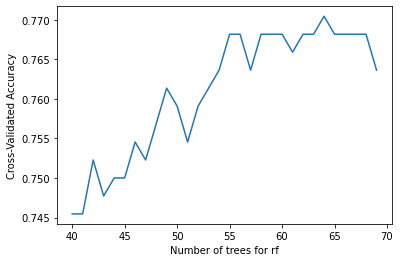

In [234]:
plt.plot(rf_range, rf_scores)
plt.xlabel('Number of trees for rf')
plt.ylabel('Cross-Validated Accuracy')

#### Prediction

In [235]:
classifier = RandomForestClassifier(random_state=42,n_estimators=65)
classifier = classifier.fit(train_pred,train_target)

prediction = classifier.predict(test_pred)

difference = prediction - test_target

#### Metrics

In [236]:
feature_importances = pandas.DataFrame(classifier.feature_importances_,
                                   index = labels,
                                    columns=['importance']).sort_values('importance',ascending=False)
display(feature_importances.head(20))

,importance
Glucose,0.299847
DiabetesPedigreeFunction,0.191426
SkinThickness,0.105500
Insulin,0.105098
"BMI_[30, 35[",0.038226
"Age_[40, 60[",0.032757
"Pregnancies_[0, 5[",0.025126
"BloodPressure_[80, 100[",0.024556
"Pregnancies_[5, 10[",0.022993
"BMI_[25, 30[",0.022956


In [237]:
print('Total number of predictions:' + str(len(prediction)))
print('Total number of wrong predictions:' + str(np.count_nonzero(difference))) 
print('Accuracy: '+ str(((len(prediction) - np.count_nonzero(difference))/len(prediction))*100)+' %')


Total number of predictions:217
Total number of wrong predictions:55
Accuracy: 74.65437788018433 %


In [238]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(test_target,prediction)
# Assigning columns names
cm_df = pandas.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df


,Predicted Negative,Predicted Positive
Actual Negative,125,21
Actual Positive,34,37


In [239]:
#metrics
print(classification_report( test_target,prediction,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.79      0.86      0.82       146
           1       0.64      0.52      0.57        71

    accuracy                           0.75       217
   macro avg       0.71      0.69      0.70       217
weighted avg       0.74      0.75      0.74       217



## Naive Bayes
Train & predict with model

In [240]:

model = BernoulliNB()
model = model.fit(nb_train_pred,nb_train_target)

naive_prediction= model.predict(nb_test_pred)
naive_difference = naive_prediction - nb_test_target

#### Prediction

In [241]:
print('Total number of predictions:' + str(len(naive_prediction)))
print('Total number of wrong predictions:' + str(np.count_nonzero(naive_difference))) 
print('Accuracy: '+ str(((len(naive_prediction) - np.count_nonzero(naive_difference))/len(naive_prediction))*100)+' %')
print("Accuracy:",metrics.accuracy_score(nb_test_target, naive_prediction))


Total number of predictions:217
Total number of wrong predictions:68
Accuracy: 68.66359447004609 %
Accuracy: 0.6866359447004609


In [242]:
# Creating the confusion matrix
cm = metrics.confusion_matrix(test_target,naive_prediction)
# Assigning columns names
cm_df = pandas.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df


,Predicted Negative,Predicted Positive
Actual Negative,131,15
Actual Positive,53,18


In [243]:
#metrics
print(classification_report( test_target,naive_prediction,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.71      0.90      0.79       146
           1       0.55      0.25      0.35        71

    accuracy                           0.69       217
   macro avg       0.63      0.58      0.57       217
weighted avg       0.66      0.69      0.65       217



## KNN 
Finding the right k

In [244]:
k_range = range(1, 15)

# list of scores from k_range
k_scores = []

# 1. we will loop through reasonable values of k
for k in k_range:
    # 2. run KNeighborsClassifier with k neighbours
    knn = KNeighborsClassifier(n_neighbors=k)
    # 3. obtain cross_val_score for KNeighborsClassifier with k neighbours
    scores = cross_val_score(knn, train_pred, train_target, cv=10, scoring='accuracy')
    # 4. append mean of scores for k neighbors to k_scores list
    k_scores.append(scores.mean())
print(k_scores)

[0.6636363636363638, 0.7022727272727274, 0.7386363636363636, 0.7181818181818181, 0.7318181818181818, 0.715909090909091, 0.7250000000000001, 0.7363636363636363, 0.7454545454545454, 0.7386363636363636, 0.7386363636363635, 0.7340909090909091, 0.7136363636363636, 0.7204545454545455]


Text(0, 0.5, 'Cross-Validated Accuracy')

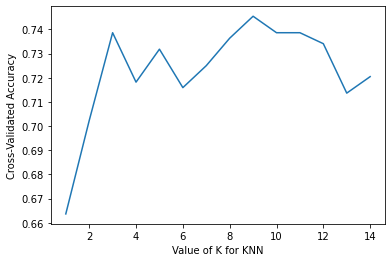

In [245]:
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')

#### Prediction

Train and predict with model

In [246]:
knn_model = KNeighborsClassifier(n_neighbors=9)
knn_model.fit(train_pred, train_target)

knn_prediction=knn_model.predict(test_pred)
knn_difference = knn_prediction - test_target

In [247]:
print('Total number of predictions:' + str(len(knn_prediction)))
print('Total number of wrong predictions:' + str(np.count_nonzero(knn_difference))) 
print('Accuracy: '+ str(((len(knn_prediction) - np.count_nonzero(knn_difference))/len(knn_prediction))*100)+' %')
print("Accuracy:",metrics.accuracy_score(test_target, knn_prediction))


Total number of predictions:217
Total number of wrong predictions:54
Accuracy: 75.11520737327189 %
Accuracy: 0.7511520737327189


In [248]:
# Creating the confusion matrix
cm = metrics.confusion_matrix( test_target,knn_prediction)
# Assigning columns names
cm_df = pandas.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df


,Predicted Negative,Predicted Positive
Actual Negative,128,18
Actual Positive,36,35


In [249]:
#metrics
print(classification_report( test_target,knn_prediction,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.78      0.88      0.83       146
           1       0.66      0.49      0.56        71

    accuracy                           0.75       217
   macro avg       0.72      0.68      0.70       217
weighted avg       0.74      0.75      0.74       217



## Voting Classifier

In [250]:
voting_pred=[]
i=0
while i < len(prediction):
    tmp=prediction[i]+naive_prediction[i]+knn_prediction[i]
    if tmp>1:
        voting_pred.append(1)
    else:
        voting_pred.append(0)
    i += 1
voting_diff=voting_pred-test_target

#### Prediction

In [251]:
print('Total number of predictions:' + str(len(voting_pred)))
print('Total number of wrong predictions:' + str(np.count_nonzero(voting_diff))) 
print('Accuracy: '+ str(((len(knn_prediction) - np.count_nonzero(voting_diff))/len(voting_pred))*100)+' %')
print("Accuracy:",metrics.accuracy_score(test_target, voting_pred))


Total number of predictions:217
Total number of wrong predictions:53
Accuracy: 75.57603686635944 %
Accuracy: 0.7557603686635944


In [252]:
# Creating the confusion matrix
cm = metrics.confusion_matrix( test_target,voting_pred)
# Assigning columns names
cm_df = pandas.DataFrame(cm, 
            columns = ['Predicted Negative', 'Predicted Positive'],
            index = ['Actual Negative', 'Actual Positive'])
# Showing the confusion matrix
cm_df


,Predicted Negative,Predicted Positive
Actual Negative,133,13
Actual Positive,40,31


In [253]:
#metrics
print(classification_report(test_target, voting_pred,target_names=['0','1']))

              precision    recall  f1-score   support

           0       0.77      0.91      0.83       146
           1       0.70      0.44      0.54        71

    accuracy                           0.76       217
   macro avg       0.74      0.67      0.69       217
weighted avg       0.75      0.76      0.74       217

